# **1. Perkenalan Dataset**



### Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

2. **Tentang Dataset**

[Heart Failure Prediction Dataset](https://www.kaggle.com/fedesoriano/heart-failure-prediction)

Dataset Gabungan untuk Prediksi Penyakit Jantung

Dataset ini merupakan hasil penggabungan dari lima dataset berbeda yang tersedia di UCI Machine Learning Repository, dirancang untuk mendukung pengembangan model prediktif dalam deteksi dini penyakit jantung.

Dataset ini terdiri dari 918 data pasien yang mencakup informasi demografis dan hasil pemeriksaan medis, seperti tekanan darah, kolesterol, detak jantung maksimum, dan hasil elektrokardiogram. Tujuan utama dari dataset ini adalah untuk membangun model klasifikasi biner guna memprediksi apakah seseorang menderita penyakit jantung.

Dataset ini memberikan fondasi yang kuat untuk penerapan *machine learning* dalam konteks kesehatan, khususnya untuk sistem pendukung keputusan klinis yang dapat membantu tenaga medis dalam mendeteksi penyakit kardiovaskular secara lebih dini dan akurat.

Dataset ini memiliki dua tujuan utama:

1. **Klasifikasi Biner**: Menentukan apakah seorang pasien berisiko mengalami penyakit jantung (output: `HeartDisease` bernilai 1 atau 0).
2. **Analisis Klinis**: Mengevaluasi faktor-faktor medis yang paling berkontribusi terhadap risiko penyakit jantung.

Dataset ini cocok digunakan untuk eksperimen pembelajaran mesin di bidang kesehatan berbasis data terbuka.



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

import ipywidgets as widgets
from IPython.display import display
from tabulate import tabulate
import os
import shutil


import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.simplefilter("ignore")

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import joblib

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

Path to dataset files: /home/ruvne/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1


In [3]:
# === Download & Prepare Dataset ===
def download_and_prepare_dataset():
    print("🔄 Downloading dataset from KaggleHub...")
    path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

    print("📂 Moving dataset to 'datasets' directory...")
    dataset_dir = os.path.join(os.getcwd(), "datasets")
    os.makedirs(dataset_dir, exist_ok=True)

    if os.path.exists(path):
        for item in os.listdir(path):
            src = os.path.join(path, item)
            dst = os.path.join(dataset_dir, item)
            if os.path.isfile(src):
                shutil.copy2(src, dst)  # safe cross-device move
                os.remove(src)

    dataset_path = os.path.join(
        dataset_dir, "heart.csv"
    )  # atau heart_failure_clinical_records_dataset.csv
    if not os.path.exists(dataset_path):
        print("📦 Extracting dataset...")
        kagglehub.dataset_extract(path, dataset_dir)

    print("✅ Dataset ready at:", dataset_path)
    return pd.read_csv(dataset_path)


# === Load Dataset ===
df = download_and_prepare_dataset()
display(df.head())

🔄 Downloading dataset from KaggleHub...
📂 Moving dataset to 'datasets' directory...
✅ Dataset ready at: /mnt/d/Programming/PycharmProjects/Dicoding/MSML/submission/Experiment_SML_ahmadrusdianto/datasets/heart.csv


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.shape

(918, 12)

In [5]:
print("\nDataset Duplicated:")
display(df.duplicated().sum())

print("\nDataset Information:")
df.info()

print("\nMissing Values per Column:")
for col in df.columns:
    print(f"{col:20} : {df[col].isna().sum()}")


Dataset Duplicated:


0


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

Missing Values per Column:
Age                  : 0
Sex                  : 0
ChestPainType        : 0
RestingBP            : 0
Cholesterol          : 0
FastingBS            : 0
Re

In [6]:
print("Statistics Results")
display(df.describe().T)

print("Statistics of all columns")
display(df.describe(include='all').T)

Statistics Results


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


Statistics of all columns


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,918.0,NaN,NaN,NaN,53.510893,9.432617,28.0,47.0,54.0,60.0,77.0
Sex,918,2,M,725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChestPainType,918,4,ASY,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RestingBP,918.0,NaN,NaN,NaN,132.396514,18.514154,0.0,120.0,130.0,140.0,200.0
Cholesterol,918.0,NaN,NaN,NaN,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,NaN,NaN,NaN,0.233115,0.423046,0.0,0.0,0.0,0.0,1.0
RestingECG,918,3,Normal,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxHR,918.0,NaN,NaN,NaN,136.809368,25.460334,60.0,120.0,138.0,156.0,202.0
ExerciseAngina,918,2,N,547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oldpeak,918.0,NaN,NaN,NaN,0.887364,1.06657,-2.6,0.0,0.6,1.5,6.2


In [7]:
explore_df = df.copy()
explore_df.head().T

,0,1,2,3,4
Age,40,49,37,48,54
Sex,M,F,M,F,M
ChestPainType,ATA,NAP,ATA,ASY,NAP
RestingBP,140,160,130,138,150
Cholesterol,289,180,283,214,195
FastingBS,0,0,0,0,0
RestingECG,Normal,Normal,ST,Normal,Normal
MaxHR,172,156,98,108,122
ExerciseAngina,N,N,N,Y,N
Oldpeak,0.0,1.0,0.0,1.5,0.0


In [8]:
# Mapping biner yang sesuai dengan dataset
binary_mappings = {
    "HeartDisease": {1: "Yes", 0: "No"},
    "FastingBS": {1: "Yes", 0: "No"},
    "ExerciseAngina": {"Y": "Yes", "N": "No"},
    "Sex": {"M": "Male", "F": "Female"},
}

# Terapkan mapping hanya untuk kolom yang tersedia
for col, mapping in binary_mappings.items():
    if col in explore_df.columns:
        explore_df[col] = explore_df[col].map(mapping)

# Tampilkan 5 baris pertama secara transpos
explore_df.sample().T

,236
Age,41
Sex,Male
ChestPainType,ASY
RestingBP,120
Cholesterol,336
FastingBS,No
RestingECG,Normal
MaxHR,118
ExerciseAngina,Yes
Oldpeak,3.0


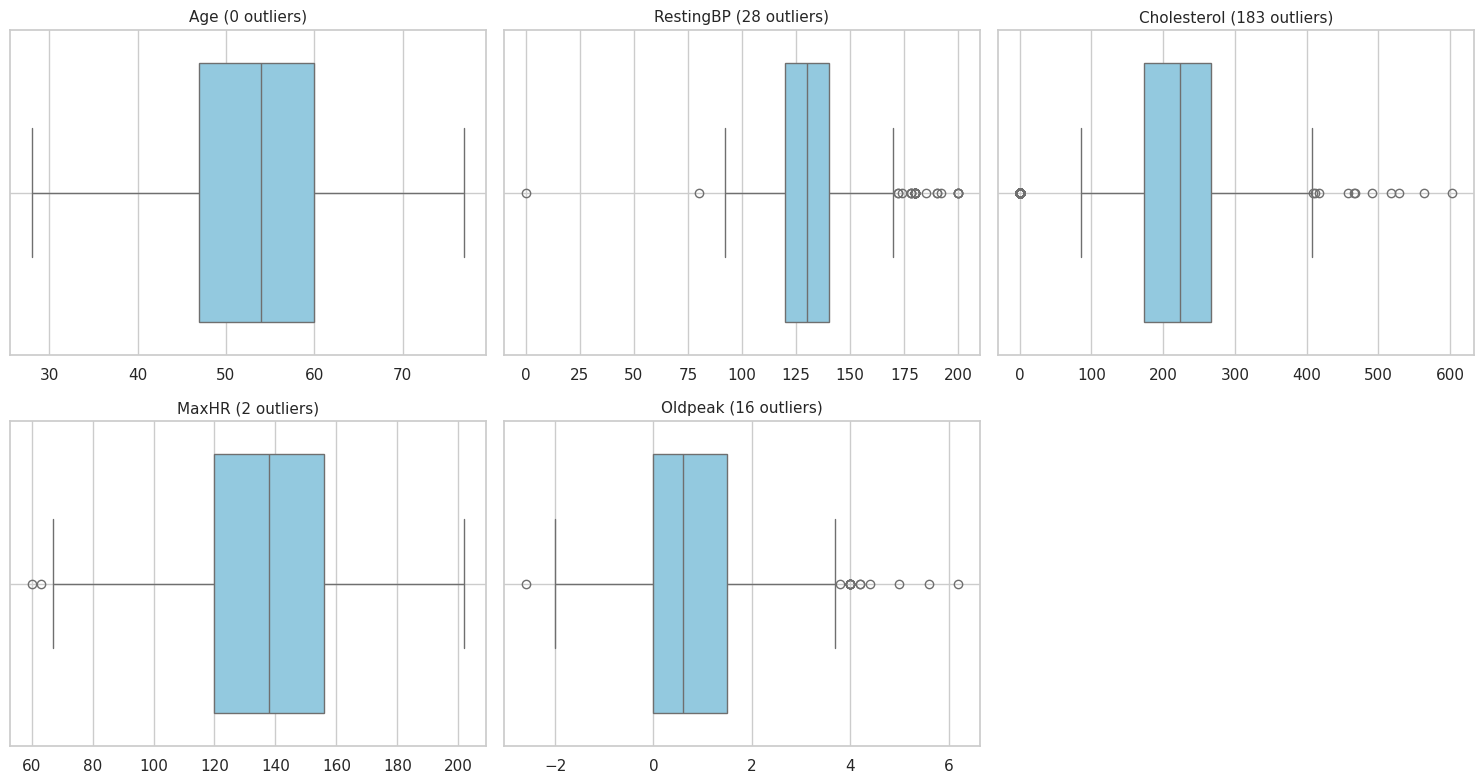

📊 Kolom dengan outlier:
- RestingBP: 28 data outliers
- Cholesterol: 183 data outliers
- MaxHR: 2 data outliers
- Oldpeak: 16 data outliers


In [9]:
numerical_columns = explore_df.select_dtypes(include=["int64", "float64"]).columns
numerical_df = explore_df[numerical_columns]

outlier_summary = {}

# Set style visual
sns.set(style="whitegrid")


# Fungsi deteksi outlier dengan metode IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]


# Hitung jumlah baris dan kolom subplot
n_cols = 3
n_rows = math.ceil(len(numerical_columns) / n_cols)

# Buat grid plot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

# Loop tiap kolom numerik
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=explore_df, x=col, ax=axes[i], color="skyblue")
    outliers = detect_outliers_iqr(explore_df, col)
    outlier_count = len(outliers)
    if outlier_count > 0:
        outlier_summary[col] = outlier_count
    axes[i].set_title(f"{col} ({outlier_count} outliers)", fontsize=11)
    axes[i].set_xlabel("")
    axes[i].grid(True)

# Hapus subplot kosong
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print summary
print("📊 Kolom dengan outlier:")
if outlier_summary:
    for col, count in outlier_summary.items():
        print(f"- {col}: {count} data outliers")
else:
    print("Tidak ada outlier terdeteksi.")

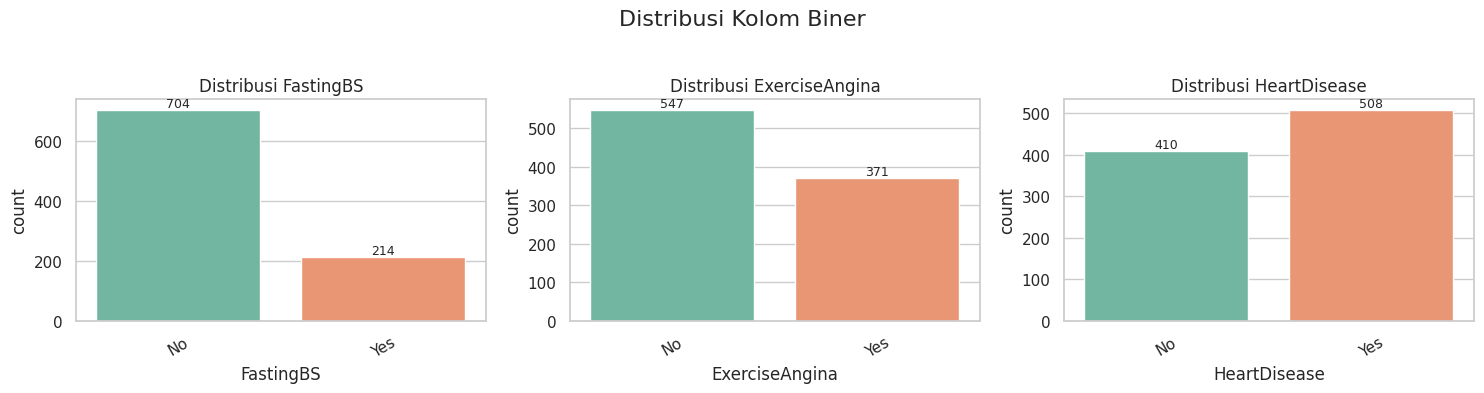

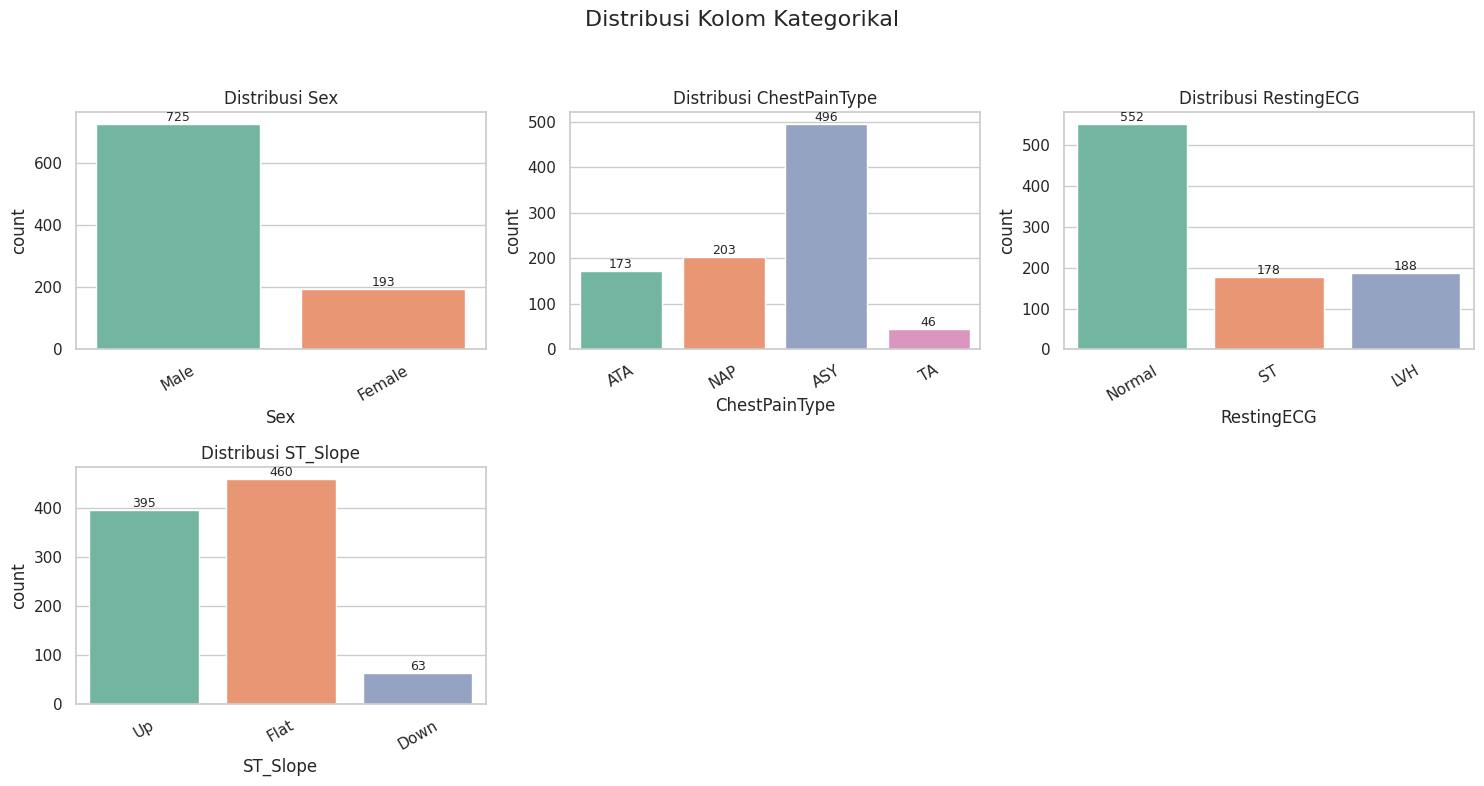

In [10]:
# Kolom biner
binary_cols = ["FastingBS", "ExerciseAngina", "HeartDisease"]

# Kolom kategorikal
categorical_cols = ["Sex", "ChestPainType", "RestingECG", "ST_Slope"]


# Fungsi visualisasi multi countplot
def plot_multiple_categorical(df, cols, title, cols_per_row=3):
    n = len(cols)
    rows = (n + cols_per_row - 1) // cols_per_row  # jumlah baris grid
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))
    axes = axes.flatten()  # agar mudah di-loop

    for i, col in enumerate(cols):
        sns.countplot(x=col, data=df, palette="Set2", ax=axes[i])
        axes[i].set_title(f"Distribusi {col}", fontsize=12)
        axes[i].tick_params(axis="x", rotation=30)

        # Tambahkan label angka di atas setiap bar
        for p in axes[i].patches:
            height = p.get_height()
            axes[i].annotate(
                f"{int(height)}",
                (p.get_x() + p.get_width() / 2.0, height),
                ha="center",
                va="bottom",
                fontsize=9,
            )

    # Hapus axes kosong (jika jumlah kolom tidak habis dibagi jumlah kolom per baris)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# 🔍 Plot distribusi biner
plot_multiple_categorical(explore_df, binary_cols, title="Distribusi Kolom Biner")

# 🔍 Plot distribusi kategorikal lainnya
plot_multiple_categorical(
    explore_df, categorical_cols, title="Distribusi Kolom Kategorikal", cols_per_row=3
)

<Figure size 2000x1800 with 0 Axes>

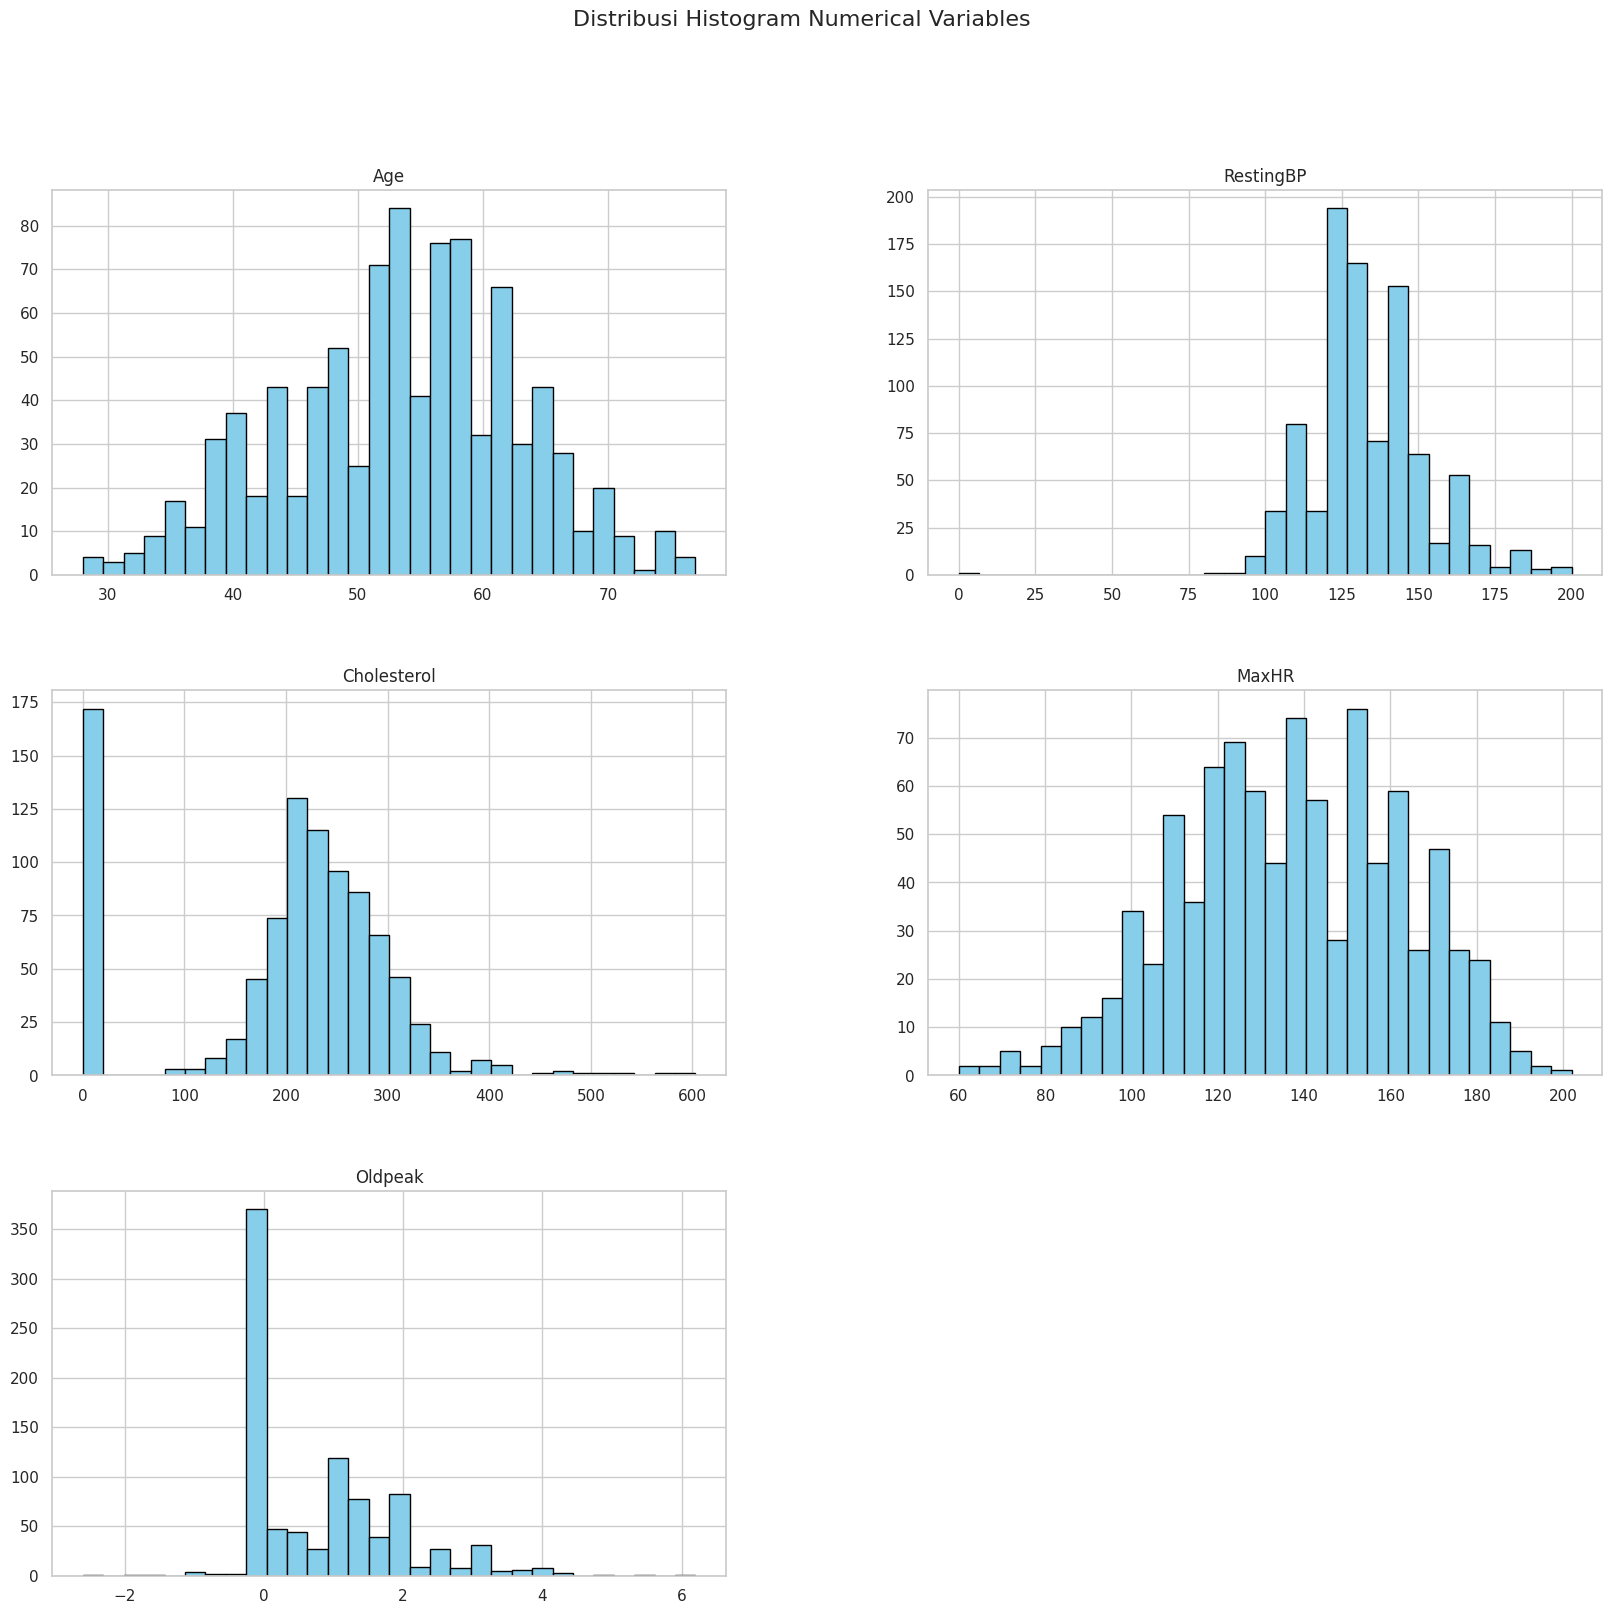

In [11]:
plt.figure(figsize=(20, 18))

# Histogram untuk distribusi visual numerik
explore_df.select_dtypes(include=["int64", "float64"]).hist(bins=30, figsize=(20, 18), color="skyblue", edgecolor="black")
plt.suptitle("Distribusi Histogram Numerical Variables", fontsize=16)
plt.show()

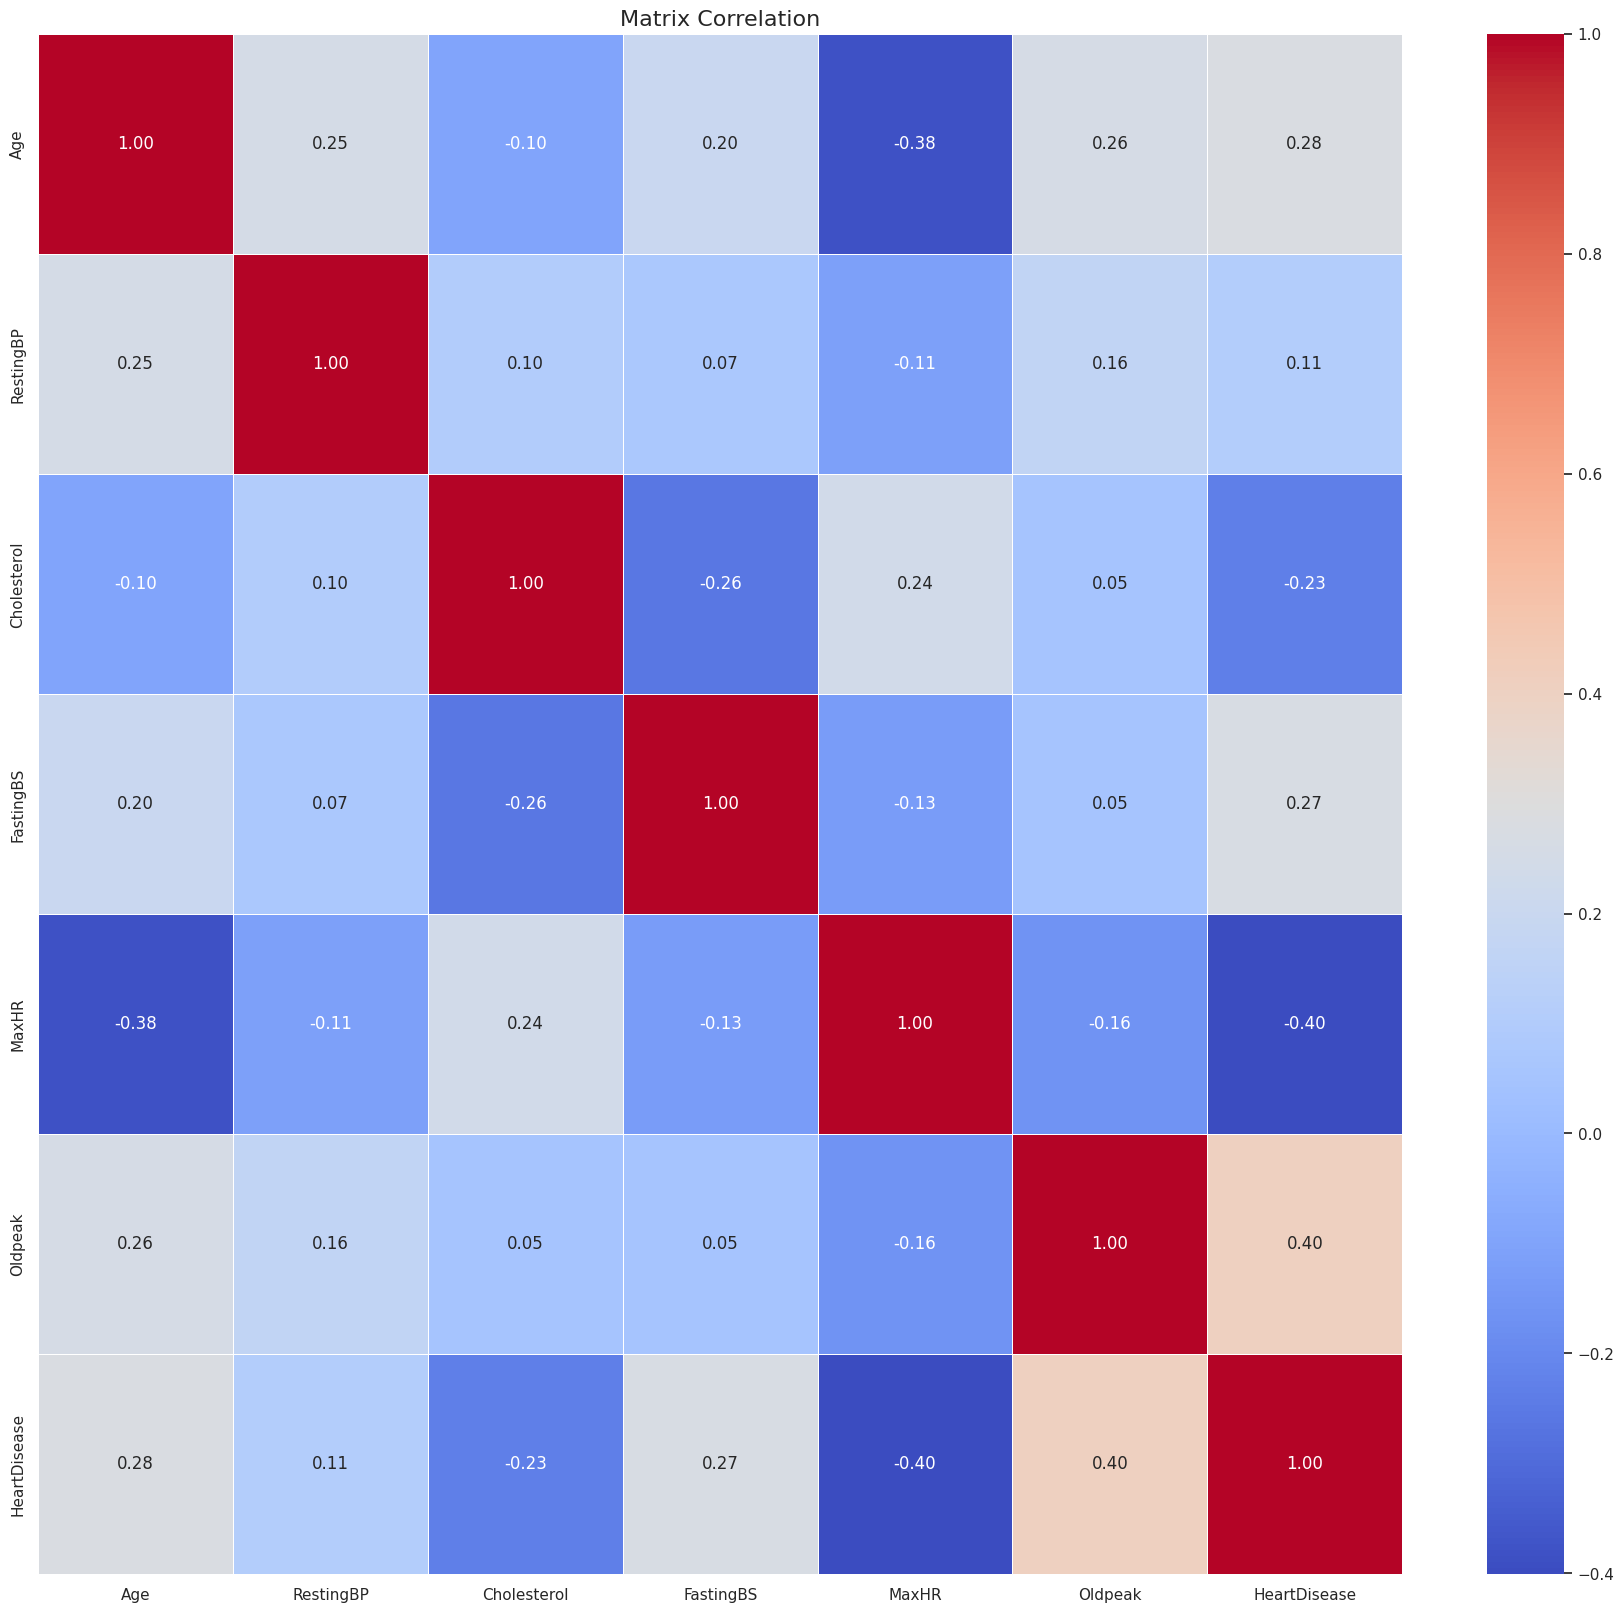

In [12]:
numerical_columns_corr = df.select_dtypes(include=["int64", "float64"]).columns
# Ubah ke dalam dataframe
numerical_corr_df = pd.DataFrame(df[numerical_columns_corr])
corr = numerical_corr_df.corr()

# Plot heatmap 
plt.figure(figsize=(22, 20))
corr_matrix = numerical_corr_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrix Correlation", fontsize=16)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## **Load Data Preprocessing**

In [13]:
# Salin dataframe untuk preprocessing
preprocessing_df = df.copy()

# Tampilkan kolom untuk konfirmasi sebelum drop
preprocessing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## **Splitting Data**

In [14]:
target_col = "HeartDisease"
num_cols = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]
cat_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
X = df.drop(columns=target_col)
y = df[target_col]

In [15]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## **Preprocessing Data**

In [16]:
scaler = StandardScaler()
X_train_num = pd.DataFrame(
    scaler.fit_transform(X_train_raw[num_cols]),
    columns=num_cols,
    index=X_train_raw.index,
)
X_test_num = pd.DataFrame(
    scaler.transform(X_test_raw[num_cols]), columns=num_cols, index=X_test_raw.index
)

# Simpan scaler
scaler_path = "preprocessing/models/scaling"
os.makedirs(scaler_path, exist_ok=True)
joblib.dump(scaler, os.path.join(scaler_path, "standard_scaler.joblib"))

['preprocessing/models/scaling/standard_scaler.joblib']

In [17]:
encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
encoder.fit(X_train_raw[cat_cols])

X_train_cat = pd.DataFrame(
    encoder.transform(X_train_raw[cat_cols]),
    columns=encoder.get_feature_names_out(cat_cols),
    index=X_train_raw.index,
)
X_test_cat = pd.DataFrame(
    encoder.transform(X_test_raw[cat_cols]),
    columns=encoder.get_feature_names_out(cat_cols),
    index=X_test_raw.index,
)

# Simpan encoder
encoder_path = "preprocessing/models/encoding"
os.makedirs(encoder_path, exist_ok=True)
joblib.dump(encoder, os.path.join(encoder_path, "onehot_encoder.joblib"))

['preprocessing/models/encoding/onehot_encoder.joblib']

In [18]:
# === 5. Gabungkan numerikal + kategorikal
X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat], axis=1)

## **OverSampling**

In [19]:


# === 6. SMOTE hanya di train
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train)

print("✅ Data selesai di-resample dan split:")
print("X_train:", X_train_resampled.shape)
print("X_test :", X_test_final.shape)

✅ Data selesai di-resample dan split:
X_train: (812, 15)
X_test : (184, 15)


In [20]:
# === 7. Simpan data & metadata
output_dir = "preprocessing/models"
os.makedirs(output_dir, exist_ok=True)

# Simpan data preprocessed
joblib.dump(
    (X_train_resampled, X_test_final, y_train_resampled, y_test),
    os.path.join(output_dir, "data_preprocessed.joblib"),
)

# Simpan nama kolom
joblib.dump(num_cols, os.path.join(output_dir, "numerical_columns.joblib"))
joblib.dump(cat_cols, os.path.join(output_dir, "categorical_columns.joblib"))
joblib.dump(
    encoder.get_feature_names_out(cat_cols).tolist(),
    os.path.join(output_dir, "encoded_feature_names.joblib"),
)

print("✅ Semua artefak preprocessing disimpan di:", output_dir)

✅ Semua artefak preprocessing disimpan di: preprocessing/models


## Pengujian dengan Model

In [21]:
import joblib
import os
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import json

# === 1. Load data ===
data_path = "preprocessing/models/data_preprocessed.joblib"
X_train, X_test, y_train, y_test = joblib.load(data_path)

# === 2. Train XGBoost ===
model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42,
)
model.fit(X_train, y_train)

# === 3. Evaluation ===
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print ringkasan
print(f"✅ Akurasi: {acc:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(conf_matrix)

✅ Akurasi: 0.8696
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        82
           1       0.89      0.87      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

Confusion Matrix:
[[71 11]
 [13 89]]
